## Entendiendo como hacer modelos de clasificación con Scikit-lean
* Profesor : Carlos Daniel Jimenez

__Descripción__: Esta es una clase introductoria y solo pretender generar un step by step desde la óptica de como construir un modelo

In [1]:
# 1. Importando Librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
## 2. Generando datos artificiales

X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=42)


In [3]:
## 3. Dividiendo los datos


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)


In [4]:
## 4. Entrenando un modelo

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [5]:
## 4. Prediciendo unos valores
y_pred = svm_model.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1]


In [6]:
## 5. Evaluando el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
## 6. visualizando los resultados

h = .02  # tamaño del paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [8]:
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

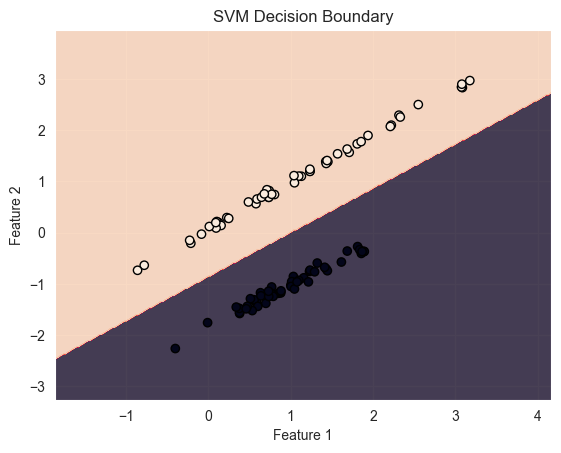

In [9]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

## Evaluando la complejidad de un modelo

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           random_state=42)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)


In [17]:
train_accuracies = {}
test_accuracies = {}

# Probar con diferentes valores de k (número de vecinos)
neighbors = np.arange(1, 15)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

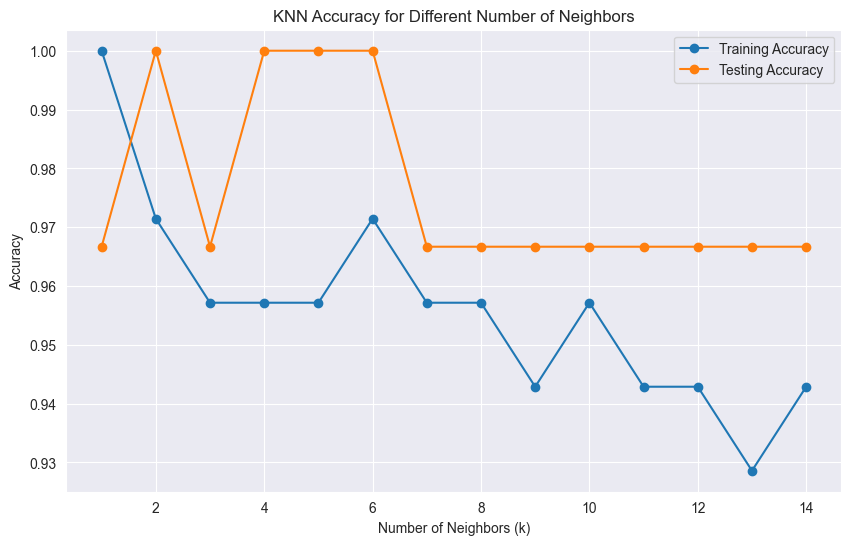

In [18]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(neighbors, list(train_accuracies.values()), label='Training Accuracy', marker='o')
plt.plot(neighbors, list(test_accuracies.values()), label='Testing Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

### Problemas de regresión

In [19]:
# 1. Importamos las librerias
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

In [21]:
# 2. creamos data sintetica
X, y = make_regression(n_samples=1000,
                       n_features=1,
                       noise=0.3,
                       random_state=42)


In [22]:
# 3. Dividivmos los datos

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)


In [23]:
# 4. Entrenamos el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# 5. Se hacen predicciones con el modelo
y_pred = model.predict(X_test)

In [28]:
# 6. Se calculan las métricas de desempeño
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 0.24522816476293494
MSE: 0.09394429676037665
RMSE: 0.3065033389057559
R²: 0.999640887160774


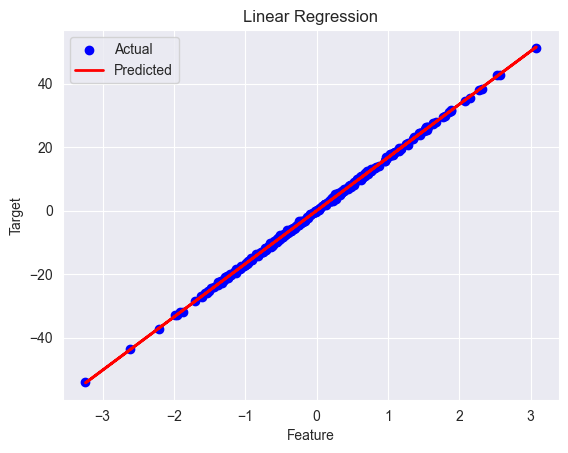

In [29]:
# 7. visualizando los resultados
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()


## Funciones de perdida y costo - aprendizaje de la máquina

In [51]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=1, noise=0.3, random_state=42)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [57]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=1, tol=None, warm_start=True, random_state=42)


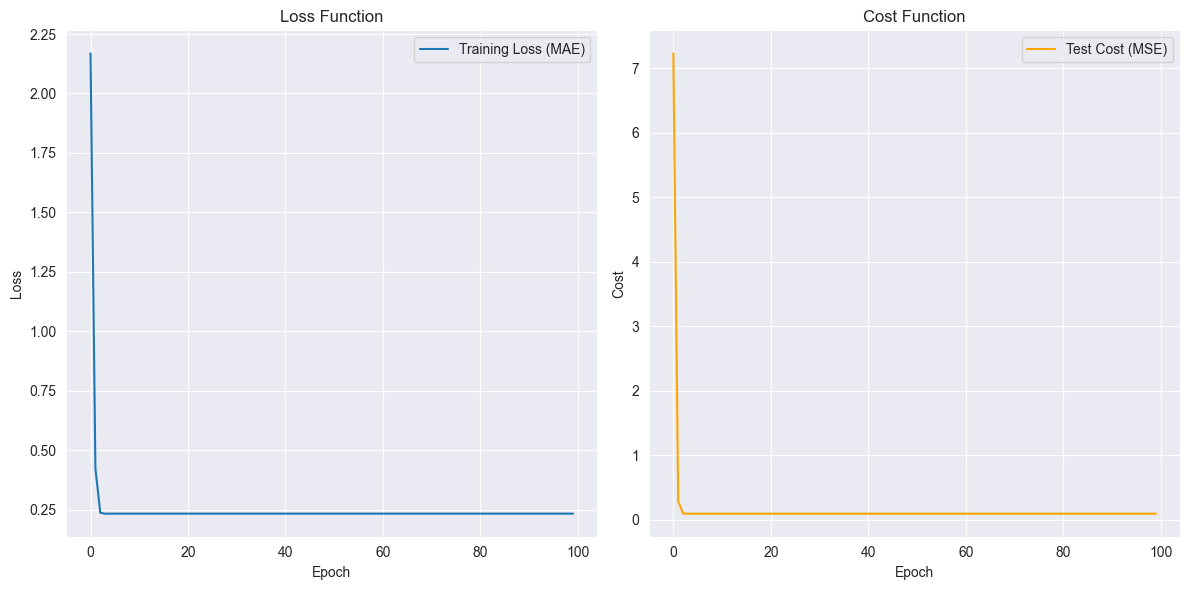

In [58]:
# Listas para almacenar las pérdidas y costos
losses = []
costs = []

# Entrenar el modelo y registrar las pérdidas y costos
n_epochs = 100
for epoch in range(n_epochs):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    loss = mean_absolute_error(y_train, y_pred_train)
    cost = mean_squared_error(y_test, y_pred_test)
    losses.append(loss)
    costs.append(cost)

# Graficar la función de pérdida
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.legend()

# Graficar la función de costo
plt.subplot(1, 2, 2)
plt.plot(costs, label='Test Cost (MSE)', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.legend()

plt.tight_layout()
plt.show()

### Cross validation

In [59]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [60]:
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)


In [61]:
model = LinearRegression()

In [62]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')


In [64]:
mse_scores = -scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f'Mean MSE: {mean_mse:.2f}')
print(f'Std MSE: {std_mse:.2f}')

Mean MSE: 0.01
Std MSE: 0.00


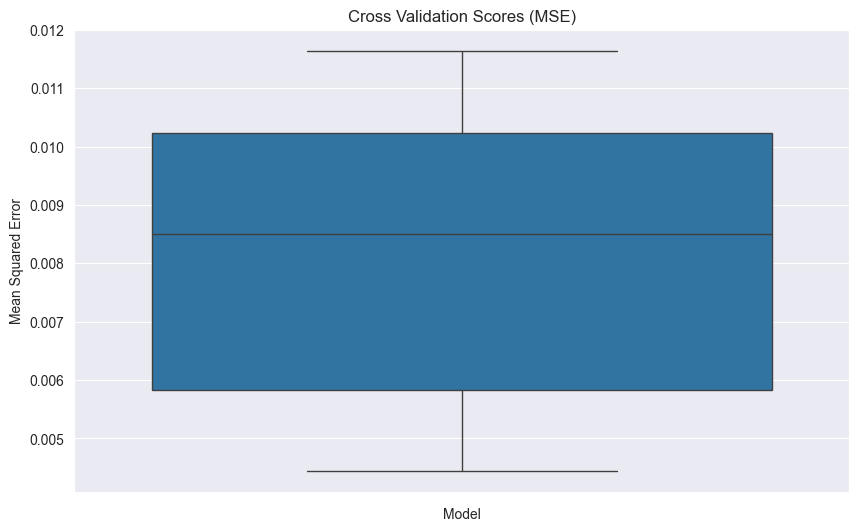

Mean MSE: 0.01
Std MSE: 0.00


In [66]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=mse_scores)
plt.title('Cross Validation Scores (MSE)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.show()


mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f'Mean MSE: {mean_mse:.2f}')
print(f'Std MSE: {std_mse:.2f}')